In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data=pd.read_csv("membership.csv",na_values=[""," ","Missing"])

In [4]:
data.isnull().sum()

MEMBERSHIP_NUMBER           0
MEMBERSHIP_TERM_YEARS       0
ANNUAL_FEES                 0
MEMBER_MARITAL_STATUS    2597
MEMBER_GENDER             611
MEMBER_ANNUAL_INCOME     1754
MEMBER_OCCUPATION_CD       43
MEMBERSHIP_PACKAGE          0
MEMBER_AGE_AT_ISSUE         0
ADDITIONAL_MEMBERS          0
PAYMENT_MODE                0
AGENT_CODE                  0
MEMBERSHIP_STATUS           0
START_DATE (YYYYMMDD)       0
END_DATE  (YYYYMMDD)     7219
dtype: int64

In [5]:
data.dtypes

MEMBERSHIP_NUMBER         object
MEMBERSHIP_TERM_YEARS      int64
ANNUAL_FEES              float64
MEMBER_MARITAL_STATUS     object
MEMBER_GENDER             object
MEMBER_ANNUAL_INCOME     float64
MEMBER_OCCUPATION_CD     float64
MEMBERSHIP_PACKAGE        object
MEMBER_AGE_AT_ISSUE        int64
ADDITIONAL_MEMBERS         int64
PAYMENT_MODE              object
AGENT_CODE                object
MEMBERSHIP_STATUS         object
START_DATE (YYYYMMDD)      int64
END_DATE  (YYYYMMDD)     float64
dtype: object

In [6]:
## Data Exploration
data["MEMBERSHIP_TERM_YEARS"].describe()

count    10362.000000
mean        29.395001
std         22.427712
min          9.000000
25%         12.000000
50%         19.000000
75%         37.000000
max        102.000000
Name: MEMBERSHIP_TERM_YEARS, dtype: float64

In [8]:
import numpy as np
data["MEMBERSHIP_TERM_YEARS"].quantile(q=np.arange(0,1,0.01))

0.00     9.0
0.01    12.0
0.02    12.0
0.03    12.0
0.04    12.0
        ... 
0.95    82.0
0.96    87.0
0.97    92.0
0.98    96.0
0.99    99.0
Name: MEMBERSHIP_TERM_YEARS, Length: 100, dtype: float64

In [9]:
data["ANNUAL_FEES"].describe()

count    1.036200e+04
mean     1.788122e+05
std      2.688747e+05
min      0.000000e+00
25%      1.000000e+05
50%      1.182093e+05
75%      1.900000e+05
max      1.010000e+07
Name: ANNUAL_FEES, dtype: float64

In [10]:
data["ANNUAL_FEES"].quantile(q=np.arange(0,1,0.1))

0.0         0.000
0.1    100000.000
0.2    100000.000
0.3    100000.000
0.4    101000.776
0.5    118209.280
0.6    125000.000
0.7    150001.200
0.8    200000.000
0.9    299995.656
Name: ANNUAL_FEES, dtype: float64

In [11]:
data["ANNUAL_FEES"]=data["ANNUAL_FEES"].map(lambda x: 299995.656 if x>299995.656 else x)

In [12]:
data.MEMBERSHIP_STATUS.value_counts()

INFORCE      7219
CANCELLED    3143
Name: MEMBERSHIP_STATUS, dtype: int64

In [13]:
data['MEMBERSHIP_STATUS'].fillna("INFORCE",inplace=True)

In [14]:
data.MEMBER_GENDER.value_counts()

M    7330
F    2421
Name: MEMBER_GENDER, dtype: int64

In [15]:
data.MEMBER_GENDER.fillna("M",inplace=True)

In [16]:
data.MEMBER_ANNUAL_INCOME.describe()

count    8.608000e+03
mean     1.451100e+06
std      1.757174e+07
min      9.996000e+03
25%      3.999960e+05
50%      5.499960e+05
75%      9.999960e+05
max      1.000000e+09
Name: MEMBER_ANNUAL_INCOME, dtype: float64

In [17]:
data.MEMBER_ANNUAL_INCOME.quantile(q=np.arange(0,1,0.1))

0.0       9996.0
0.1     290000.4
0.2     349992.0
0.3     399996.0
0.4     499992.0
0.5     549996.0
0.6     699996.0
0.7     900000.0
0.8    1099992.0
0.9    1800000.0
Name: MEMBER_ANNUAL_INCOME, dtype: float64

In [18]:
data.MEMBER_ANNUAL_INCOME=data.MEMBER_ANNUAL_INCOME.map(lambda x:  1800000 if x> 1800000 else x)

In [19]:
data.MEMBER_ANNUAL_INCOME.describe()

count    8.608000e+03
mean     7.436371e+05
std      4.908218e+05
min      9.996000e+03
25%      3.999960e+05
50%      5.499960e+05
75%      9.999960e+05
max      1.800000e+06
Name: MEMBER_ANNUAL_INCOME, dtype: float64

In [20]:
data.MEMBER_ANNUAL_INCOME.fillna(5.499960e+05,inplace=True)

In [21]:
data.MEMBERSHIP_PACKAGE.value_counts()

TYPE-B    6809
TYPE-A    3553
Name: MEMBERSHIP_PACKAGE, dtype: int64

In [22]:
data.MEMBER_AGE_AT_ISSUE.describe()

count    10362.000000
mean        46.798494
std         13.897085
min          0.000000
25%         37.000000
50%         46.000000
75%         57.000000
max         92.000000
Name: MEMBER_AGE_AT_ISSUE, dtype: float64

In [23]:
data.ADDITIONAL_MEMBERS.describe()

count    10362.000000
mean         1.412276
std          1.145136
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          3.000000
Name: ADDITIONAL_MEMBERS, dtype: float64

In [24]:
data.PAYMENT_MODE.value_counts()

ANNUAL            6589
MONTHLY           1881
SEMI-ANNUAL       1493
QUARTERLY          390
SINGLE-PREMIUM       9
Name: PAYMENT_MODE, dtype: int64

In [25]:
mask=data[data.PAYMENT_MODE=="SINGLE-PREMIUM"].index

In [26]:
data.drop(mask,inplace=True)

In [27]:
data.shape

(10353, 15)

In [29]:
## Columns to be used ror modelling
col=["PAYMENT_MODE","ADDITIONAL_MEMBERS","MEMBER_AGE_AT_ISSUE","MEMBERSHIP_PACKAGE","MEMBER_ANNUAL_INCOME","MEMBER_GENDER",
     "MEMBERSHIP_STATUS","ANNUAL_FEES","MEMBERSHIP_TERM_YEARS"]
data_mod=data[col]

In [30]:
## Create target variable
data_mod.MEMBERSHIP_STATUS.value_counts()

INFORCE      7210
CANCELLED    3143
Name: MEMBERSHIP_STATUS, dtype: int64

In [31]:
data_mod.MEMBERSHIP_STATUS=data_mod.MEMBERSHIP_STATUS.map(lambda x: 0 if x=="INFORCE" else 1)

/var/folders/7h/01sjg2sx6tl3y72r2klm24c80000gn/T/ipykernel_14224/3928734736.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_mod.MEMBERSHIP_STATUS=data_mod.MEMBERSHIP_STATUS.map(lambda x: 0 if x=="INFORCE" else 1)


In [32]:
## Create test train data
train=data_mod.sample(frac=0.7,random_state=200)
test=data_mod.drop(train.index)

In [33]:
train.shape

(7247, 9)

In [34]:
test.shape

(3106, 9)

In [35]:
## Model
import statsmodels.formula.api as smf
import statsmodels.api as sm
from patsy import dmatrices

In [36]:
train.dtypes

PAYMENT_MODE              object
ADDITIONAL_MEMBERS         int64
MEMBER_AGE_AT_ISSUE        int64
MEMBERSHIP_PACKAGE        object
MEMBER_ANNUAL_INCOME     float64
MEMBER_GENDER             object
MEMBERSHIP_STATUS          int64
ANNUAL_FEES              float64
MEMBERSHIP_TERM_YEARS      int64
dtype: object

In [37]:
"+".join(train.columns)

'PAYMENT_MODE+ADDITIONAL_MEMBERS+MEMBER_AGE_AT_ISSUE+MEMBERSHIP_PACKAGE+MEMBER_ANNUAL_INCOME+MEMBER_GENDER+MEMBERSHIP_STATUS+ANNUAL_FEES+MEMBERSHIP_TERM_YEARS'

In [38]:
model=smf.glm('''MEMBERSHIP_STATUS~C(PAYMENT_MODE)+ADDITIONAL_MEMBERS+MEMBER_AGE_AT_ISSUE+C(MEMBERSHIP_PACKAGE)
               +MEMBER_ANNUAL_INCOME+C(MEMBER_GENDER)+ANNUAL_FEES+MEMBERSHIP_TERM_YEARS''',data=train,
                family=sm.families.Binomial()).fit()

In [39]:
print(model.summary2())

                       Results: Generalized linear model
Model:                   GLM                    AIC:                 8379.7797  
Link Function:           Logit                  BIC:                 -55958.2693
Dependent Variable:      MEMBERSHIP_STATUS      Log-Likelihood:      -4178.9    
Date:                    2023-01-09 11:28       LL-Null:             -4456.9    
No. Observations:        7247                   Deviance:            8357.8     
Df Model:                10                     Pearson chi2:        7.19e+03   
Df Residuals:            7236                   Scale:               1.0000     
Method:                  IRLS                                                   
--------------------------------------------------------------------------------
                                 Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------------------
Intercept                       -1.6549   0.1528 -10

In [40]:
predictions=model.predict(test)

In [41]:
predictions.head()

2     0.231347
3     0.225863
5     0.311249
12    0.435447
17    0.443697
dtype: float64

In [42]:
import sklearn.metrics as metrics

In [43]:
fpr,tpr,thresholds=metrics.roc_curve(test['MEMBERSHIP_STATUS'],predictions)

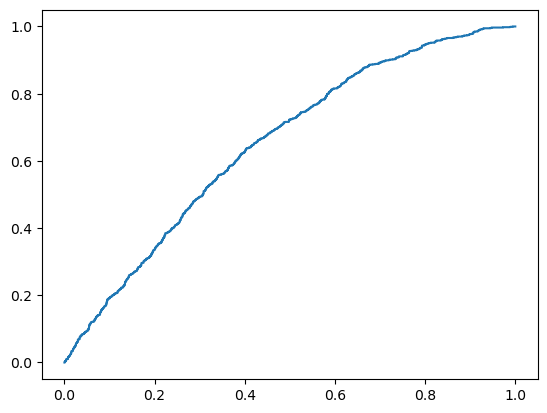

In [44]:
plt.plot(fpr,tpr,"-")

In [45]:
metrics.roc_auc_score(test["MEMBERSHIP_STATUS"],predictions)

0.6507845728217642

In [46]:
test['MEMBERSHIP_STATUS'].mean()

0.30038634900193173

In [47]:
y_preds = predictions.map(lambda x: 1 if x>0.3003 else 0)

In [48]:
metrics.confusion_matrix(test['MEMBERSHIP_STATUS'],y_preds)

array([[1132, 1041],
       [ 277,  656]])

In [49]:
### Note to instructor, instructor should try to make the discussion interactive. This notebook is only indicative and 
### the instructor is free to modify ?